In [27]:
import json

# Load the JSON data from the file
with open('MC3.json', encoding='utf-8') as file:
    data = json.load(file)

# Initialize empty lists for keys and values
keys = []
values = []

# Iterate over each dictionary in the 'nodes' list
for dictionary in data['nodes']:
    # Extract the keys and values from the dictionary
    for key, value in dictionary.items():
        keys.append(key)
        values.append(value)

# Print the lists of keys and values
print("Keys:", keys)
print("Values:", values)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
# Convert the 'keys' list to a set to get unique elements
unique_keys = set(keys)

# Print the unique keys
print("Unique Keys:", unique_keys)


Unique Keys: {'revenue_omu', 'country', 'id', 'type', 'product_services'}


In [29]:
import pandas as pd
import json

# Load the JSON data from the file
with open('MC3.json', encoding='utf-8') as file:
    data = json.load(file)

# Initialize an empty list to store the data rows
rows = []

# Iterate over each dictionary in the 'nodes' list
for dictionary in data['nodes']:
    # Extract the values for 'type', 'dataset', 'country', 'id' keys
    type_value = dictionary.get('type', ' ')[0]
    product_value = dictionary.get('product_services', ' ')
  #  product_value = product_value.strip('[]').split(',')[0].strip()
    country_value = dictionary.get('country', ' ')[0]
    revenue_omu_value = dictionary.get('revenue_omu', ' ')[0]
    id_value = dictionary.get('id', ' ')[0]

    # Append the values as a new row to the list
    rows.append([type_value,product_value, country_value,revenue_omu_value, id_value])

# Create a DataFrame with the specified columns and filled data
df = pd.DataFrame(rows, columns=['type', 'product', 'country','revenue', 'id'])

# Print the DataFrame
print(df)


                   type                                            product  \
0               Company                                      [Automobiles]   
1               Company          [Passenger cars, trucks, vans, and buses]   
2               Company  [Holding firm whose subsidiaries are engaged i...   
3               Company  [Car service, car parts and accessories, autom...   
4               Company  [Fully electric vehicles (EVs) and electric ve...   
...                 ...                                                ...   
27617  Company Contacts                                                 []   
27618  Company Contacts                                                 []   
27619  Company Contacts                                                 []   
27620  Company Contacts                                                 []   
27621  Company Contacts                                                 []   

          country         revenue                              

In [30]:
#understanding the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27622 entries, 0 to 27621
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     27622 non-null  object
 1   product  27622 non-null  object
 2   country  27622 non-null  object
 3   revenue  27622 non-null  object
 4   id       27622 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [9]:
df.describe()

,type,product,country,revenue,id
count,27622,27622,27622,27622,27622
unique,3,3244,100,4639,22929
top,Beneficial Owner,[],ZH,,Smith LLC
freq,11949,18959,22439,18959,40


In [10]:
df.isnull().sum()

type       0
product    0
country    0
revenue    0
id         0
dtype: int64

In [11]:
unique_values = df["revenue"].unique()


In [12]:
unique_values

array([310612303.447, 162734683.9969, 115004666.6728, ..., 131680733.227,
       142196552.227, ' '], dtype=object)

In [13]:
import pandas as pd

# Replace empty strings with null values in the DataFrame
df.replace(' ', pd.NA, inplace=True)

# Check for null values
print(df.isnull().sum())

type           0
product        0
country        0
revenue    18959
id             0
dtype: int64


In [14]:
import pandas as pd

# Convert non-numeric values to NaN
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

# Calculate the mean  or average
mean_revenue = df["revenue"].mean()

# Fill missing values with the mean
#df["revenue"].fillna(mean_revenue, inplace=True)
df["revenue"].dropna()

0       3.106123e+08
1       1.627347e+08
2       1.150047e+08
3       9.098641e+07
4       8.146667e+07
            ...     
8658    5.537619e+07
8659    3.628195e+07
8660    9.756875e+07
8661    1.316807e+08
8662    1.421966e+08
Name: revenue, Length: 6107, dtype: float64

In [15]:
df.isnull().sum()


type           0
product        0
country        0
revenue    21515
id             0
dtype: int64

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27622 entries, 0 to 27621
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   type     27622 non-null  object 
 1   product  27622 non-null  object 
 2   country  27622 non-null  object 
 3   revenue  6107 non-null   float64
 4   id       27622 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [17]:
df.head()

,type,product,country,revenue,id
0,Company,[Automobiles],ZH,3.106123e+08,Jones LLC
1,Company,"[Passenger cars, trucks, vans, and buses]",ZH,1.627347e+08,"Coleman, Hall and Lopez"
2,Company,[Holding firm whose subsidiaries are engaged i...,Oceanus,1.150047e+08,Aqua Advancements Sashimi SE Express
3,Company,"[Car service, car parts and accessories, autom...",Utoporiana,9.098641e+07,Makumba Ltd. Liability Co
4,Company,[Fully electric vehicles (EVs) and electric ve...,ZH,8.146667e+07,"Taylor, Taylor and Farrell"


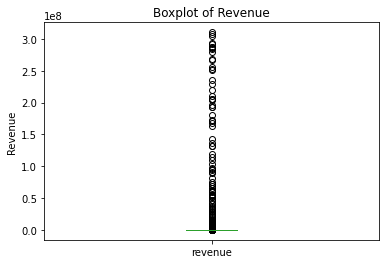

In [18]:
import matplotlib.pyplot as plt

df["revenue"].plot.box()
plt.ylabel("Revenue")
plt.title("Boxplot of Revenue")
plt.show()


In [19]:
Q1 = df["revenue"].quantile(0.25)
Q3 = df["revenue"].quantile(0.75)


In [20]:
IQR = Q3 - Q1


In [21]:
Q3,Q1

(48327.661550000004, 7676.35915)

In [22]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)



In [23]:
df_filtered = df[(df["revenue"] >= lower_bound) & (df["revenue"] <= upper_bound)]


In [24]:
Q1 = df["revenue"].quantile(0.25)
Q3 = df["revenue"].quantile(0.65)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df_filtered = df[(df["revenue"] >= lower_bound) & (df["revenue"] <= upper_bound)]


In [25]:
df_filtered

,type,product,country,revenue,id
1259,Company,[Commercial fishing equipment],ZH,59764.8570,Morales PLC
1260,Company,"[Prawns, squids, and octopus; Refrigerated smo...",Nalakond,59682.0101,Sea Breezes Sagl Seaside
1261,Company,"[Luxury vinyl flooring, premium laminate and a...",ZH,59666.6728,Walker-Richardson
1262,Company,[Clothing and footwear products],ZH,59666.6728,"Payne, Freeman and Kim"
1263,Company,[Consumer adhesives and craftsman adhesives],ZH,59639.9498,"Mcmillan, Brock and Carroll"
...,...,...,...,...,...
6046,Company,[Management and consultancy services],Oceanus,4666.6728,Gujarat Sea Plc United
6047,Company,[Unknown],ZH,4666.6728,"Li, Hudson and Mclean"
6048,Company,[Unknown],ZH,4660.6650,"Boyer, Tucker and Diaz"
6049,Company,[Unknown],Marebak,4657.7974,Bu yu wang Pic Export


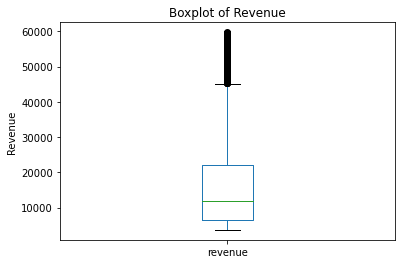

In [26]:
import matplotlib.pyplot as plt

df_filtered["revenue"].plot.box()
plt.ylabel("Revenue")
plt.title("Boxplot of Revenue")
plt.show()


In [ ]:
#